# Recurrent Neural Networks/LSTM's for financial time series predictions

Recurrent neural networks, or RNNs, are a type of artificial neural network that add additional weights to the network to create cycles in the network graph in an effort to maintain an internal state.The promise of adding state to neural networks is that they will be able to explicitly learn and exploit context in sequence prediction problems, such as problems with an order or temporal component. In A Recurrent Neural Network each unit/node remebers what was there in the previous unit/node and hence well suited for time series predictions. The architecture is so designed that recurring weights are used to connect hidden layers among themselves. This can infact bring about `vanishing gradient` problem in RNN's. A practical solution to it being the Long Short Term Memory Networks (LSTM's) and its typical architecture. LSTM's find significant applications today in language translation apps, sentiment analysis and so on.

This project uses LSTM's for predicting financial market time series prediction i.e with Google Stock Prices.The RNN will be trained on data on working days from from January 2012 to December 2016, over a period of 5 years and then will be tested to predict stock prices for the month of January 2017. The dataset can be extracted from : https://finance.google.com/finance/historical?q=GOOG

The implementation is done using the Keras library in Python using Tensorflow backend.

Lets begin by importing the libraries and the dataset

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

Now lets preview the dataset. 

In [3]:
dataset_train.head(10)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
7,1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
8,1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"
9,1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


Data is in a very usable format with no NA's. The data has 1258 rows.

We will be building RNN's to predict the Open Google stock prices  and so we will retain the first column only.

In [4]:
training_set = dataset_train.iloc[:,1:2].values

## Data Preprocessing

### 1. Feature Scaling

Feature scaling is a must to do in Deep Learning. Here MinMaxScaler is used for better results.

In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

### 2. Creating a data structure with 60 timesteps and t+1 output

For setting timestep 60, we need to create an X_train numpy array with 1258-60 =1198 rows and each with 60 elements from training set.

In [6]:
# Creating a data structure with 60 timesteps and t+1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### 3. Reshaping
We need to create a 3D array for processing with Keras. The argument `newshape` has inputs `batch_size`, `timesteps`,  `input_dim`. 
Note that `batch_size` = No of rows in `X_train` and `timesteps` = 60

In [7]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building the RNN

We make use of Keras, with a tensorflow backend.

In [11]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

We now initialize RNN's as a sequnce of layers and add input and output layers.

In [12]:
# Initialising the RNN
regressor = Sequential()

The LSTM layers are added as follows with 50 memory units and input dimension with 1 feature. `return_sequences = True` is a required parameter that must be set to True when stacking two LSTM layers. A Dropout regularization of 20% is also added for each LSTM layer.

In [13]:
# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [14]:
# Adding a second LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

We have created 4 LSTM layers. Output layer is added with the `Dense` class with one-dimension

In [15]:
# Adding the output layer
regressor.add(Dense(units = 1))

To complie the RNN, we use `rmsprop` optimizer and loss function chosen is MSE. The RNN is fit to the data for 100 epochs with a default `batch_size` of 32

In [16]:
# Compiling the RNN
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
1198/1198 [==============================] - 30s - loss: 0.0390    
Epoch 2/100
1198/1198 [==============================] - 29s - loss: 0.0144    
Epoch 3/100
1198/1198 [==============================] - 29s - loss: 0.0117    
Epoch 4/100
1198/1198 [==============================] - 30s - loss: 0.0091    
Epoch 5/100
1198/1198 [==============================] - 30s - loss: 0.0091    
Epoch 6/100
1198/1198 [==============================] - 31s - loss: 0.0077    
Epoch 7/100
1198/1198 [==============================] - 30s - loss: 0.0078    
Epoch 8/100
1198/1198 [==============================] - 29s - loss: 0.0064    
Epoch 9/100
1198/1198 [==============================] - 28s - loss: 0.0076    
Epoch 10/100
1198/1198 [==============================] - 27s - loss: 0.0067    
Epoch 11/100
1198/1198 [==============================] - 28s - loss: 0.0065    
Epoch 12/100
1198/1198 [==============================] - 26s - loss: 0.0052    
Epoch 13/100
1198/1198 [=============

Observe that the loss function has converged to a small value. 

## Making Predictions

Making predictions with timestep =60 can be tricky. The real Google Stock price is contained in the test set for January 2017. Also we need the entire data in one frame.i.e. from Jan 1st 2012 to Jan 31st 2017.

In [17]:
# Getting the real stock price for January 1st 2012 - January 31st 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

To get the predicted stock price, we create an array of X_test , in a similar way we created X_train before.

In [18]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

After inverse scaling, `predicted_stock_price` will contain the predicted values for `real_stock_price`

## Evaluating the results

Lets evaluate the RMSE for the the regression problem. RMSE should be expressed as percentage of `real_stock_price`(y_test). Generally a good rmse is below 1%

In [19]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
(rmse/np.mean(real_stock_price))*100

5.8758650604492946

Observe that the RMSE is more than 1%.

Now visualize the actual vs predicted

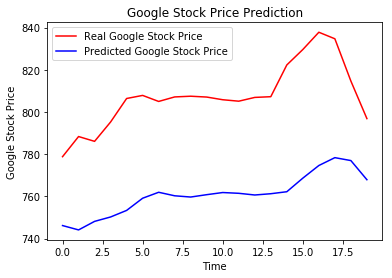

In [21]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## Concluding Remarks

1. The predictive model for the Stock price predictions with an RMSE of 5.8% is obtained. 
2. The model seems to be good enough to capture the features of the dataset and in making predictions. Yet significant improvement can be brought by performing k-fold cross validation and hyperparameter tuning
